In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [34]:
print("Beginning Data Retrieval")
print("-----------------------------")
cities_df = []
record_count=1
set_count=1
for x in cities:
    response = requests.get("http://api.openweathermap.org/data/2.5/weather?", params=dict(q=x, units="imperial", APPID=api_key))
    if response.status_code != 200:
        print("City not found. Skipping...")
    else:
        response = requests.get("http://api.openweathermap.org/data/2.5/weather?", params=dict(q=x, units="imperial", APPID=api_key)).json()
        print(f"Processing Record {record_count} of Set {set_count} | {x}")
        cities_df.append(response)
        record_count += 1
        if record_count == 51:
            record_count = 1
            set_count += 1
            
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | coihaique
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | maiduguri
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | byron bay
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | sorland
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | porto belo
Processing Record 15 of Set 1 | riviera beach
Processing Record 16 of Set 1 | neuquen
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | thompson
City not found. Skipping...
Processing Record 19 of Set 1 | imeni poliny osipenko
Processing Record 20 of Set 1 | brae
Processing Record 21 of Set 1 | seoul
City not found. Skipping...
Processing 

In [35]:
## create dataframe from all responses
DF = pd.DataFrame(cities_df)

In [36]:
## reordering dataframe with city name as first column
cols = list(DF)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('name')))
# use ix to reorder
testDF = DF.loc[:, cols]

In [37]:
testDF.head()

,name,base,clouds,cod,coord,dt,id,main,rain,sys,visibility,weather,wind
0,Coihaique,stations,{'all': 40},200,"{'lon': -72.07, 'lat': -45.58}",1545256800,3894426,"{'temp': 67.77, 'pressure': 1013, 'humidity': ...",NaN,"{'type': 1, 'id': 8491, 'message': 0.0037, 'co...",10000.0,"[{'id': 802, 'main': 'Clouds', 'description': ...",{'speed': 4.7}
1,Mar del Plata,stations,{'all': 0},200,"{'lon': -67.52, 'lat': -46.43}",1545259943,3863379,"{'temp': 59.16, 'pressure': 1007.72, 'humidity...",NaN,"{'message': 0.0031, 'country': 'AR', 'sunrise'...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 5.61, 'deg': 77.0004}"
2,Saint-Philippe,stations,{'all': 1},200,"{'lon': -73.48, 'lat': 45.36}",1545258900,6138908,"{'temp': 25.52, 'pressure': 1017, 'humidity': ...",NaN,"{'type': 1, 'id': 4146, 'message': 0.006, 'cou...",16093.0,"[{'id': 600, 'main': 'Snow', 'description': 'l...","{'speed': 3.36, 'deg': 170}"
3,Cherskiy,stations,{'all': 12},200,"{'lon': 161.3, 'lat': 68.75}",1545260086,2126199,"{'temp': -41.96, 'pressure': 1020.93, 'humidit...",NaN,"{'message': 0.0038, 'country': 'RU', 'sunrise'...",NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...","{'speed': 1.59, 'deg': 152}"
4,Maiduguri,stations,{'all': 0},200,"{'lon': 13.15, 'lat': 11.84}",1545260086,2331447,"{'temp': 58.44, 'pressure': 992.96, 'humidity'...",NaN,"{'message': 0.0026, 'country': 'NG', 'sunrise'...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 7.63, 'deg': 26.0004}"


In [49]:
## function that extracts elements needed for output dataframe
def df_builder(x):
    list_appender = []
    list_appender.append(testDF['name'][x])
    list_appender.append(testDF['clouds'][x]['all'])
    list_appender.append(testDF['sys'][x]['country'])
    list_appender.append(testDF['dt'][x])
    list_appender.append(testDF['main'][x]["humidity"])
    list_appender.append(testDF['coord'][x]["lat"])
    list_appender.append(testDF['coord'][x]["lon"])
    list_appender.append(testDF['main'][x]["temp_max"])
    list_appender.append(testDF['wind'][x]["speed"])
    return list_appender
## set output data frame with desired columns    
outputDF=pd.DataFrame(columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
## use function to create dataframe with desired values and format
for x in range(len(testDF)):
    outputDF.loc[x] = df_builder(x)

In [52]:
##output sample
outputDF.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

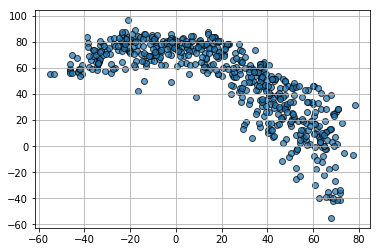

In [53]:
plt.scatter(outputDF['Lat'],outputDF["Max Temp"],alpha=.7,edgecolor='black')
plt.grid()
#plt.ylim(25,100)